# IMA 205 - TP ANN (part A)
## Coding a Multi-Layer Perceptron in python (for a binary classification problem)

*TP adapted by Alasdair Newson from the IA-306 course, originally written by Geoffroy Peeters*<br>

Modified by Loic Le Folgoc. If you have questions, contact me at loic.lefolgoc@telecom-paris.fr

$\newcommand{\underbr}[2]{\underbrace{#1}_{\scriptscriptstyle{#2}}}$

### Objective:
We want to implement a 1 hidden layer MLP in Python.

#### Forward propagation

- $\large \underbr{Z^{[1]}}{(n^{[1]},m)} = \underbr{W^{[1]}}{(n^{[1]},n^{[0]})} \underbr{X}{(n^{[0]},m)} + \underbr{b^{[1]}}{n^{(1)}} $
- $\large \underbr{A^{[1]}}{(n^{[1]},m)} = f(Z^{[1]})$
- $\large \underbr{Z^{[2]}}{(n^{[2]},m)} = \underbr{W^{[2]}}{(n^{[2]},n^{[1]})} \underbr{A^{[1]}}{(n^{[1]},m)} + \underbr{b^{[2]}}{n^{(2)}}$
- $\large \underbr{A^{[2]}}{(n^{[2]},m)} = \sigma(Z^{[2]})$

where:
- $\hat{y} = \large A^{[2]}$, in other words $\large A^{[2]}$ is the network output
- $f$ is a ```Relu``` function (the code is provided)
- $\sigma$ is a sigmoid function (the code is provided)
- $m$ is the minibatch size (number of data samples in the minibatch)
- $n^{[0]}$ is the number of neurons in the input layer (dimensionality of a data sample)
- $n^{[1]}$ is the number of neurons in the hidden layer
- $n^{[2]}=1$ is the number of neurons in the output layer (dimensionality of the output =1 for binary classification)

#### Compute the cost

The cost is average of the the loss over the training data. Since we are dealing with a binary classification problem, we will use the binary cross-entropy, which for 1 data sample writes as:

$\mathcal{L}(\hat{y},y) = - y \log(\hat{y}) - (1-y) \log(1-\hat{y}) $

where $y$ is the label (ground truth) and $\hat{y}$ is the prediction.

#### Backward propagation

We admit that the backward propagation can be calculated as follows. We note $dZ$ as a shortcut for $\frac{\partial \mathcal{L}}{\partial Z}$, and similarly for other variables.

- $\large \underbr{dZ^{[2]}}{(n^{[2]},m)} = \underbr{A^{[2]}}{(n^{[2]},m)} - \underbr{{Y}}{(n^{[2]},m)}$
- $\large \underbr{dW^{[2]}}{(n^{[2]},n^{[1]})} = \frac{1}{m} \underbr{dZ^{[2]}}{(n^{[2]},m)} {\underbr{A^{[1]}}{(n^{[1]},m)}}^{T}$
- $\large \underbr{db^{[2]}}{(n^{[2]})} = \frac{1}{m} \sum_{i=1}^{m} \underbr{dZ^{[2]}}{(n^{[2]},m)}$

- $\large \underbr{dA^{[1]}}{(n^{[1]},m)} = {\underbr{W^{[2]}}{(n^{[2]},n^{[1]})}}^{T} \underbr{dZ^{[2]}}{(n^{[2]},m)}$
- $\large \underbr{dZ^{[1]}}{(n^{[1]},m)} = \underbr{dA^{[1]}}{(n^{[1]},m)} \: \odot \: f' (\underbr{Z^{[1]}}{(n^{[1]},m)})$
- $\large \underbr{dW^{[1]}}{(n^{[1]},n^{[0]})} = \frac{1}{m} \underbr{dZ^{[1]}}{(n^{[1]},m)} {\underbr{X}{(n^{[0]},m)}}^{T}$
- $\large \underbr{db^{[1]}}{(n^{[1]})} = \frac{1}{m} \sum_{i=1}^{m} \underbr{dZ^{[1]}}{(n^{[1]},m)}$

Write the corresponding backward propagation algorithm.

#### Parameters update

- Implement a simple gradient descent:
- $W = W - \alpha dW$


#### IMPORTANT IMPLEMENTATION INFORMATION !

We recall that the $\odot$ operator refers to the __point-wise multiplication__ operation. Note that we need $f'$, the derivative of the ReLU function, in order to calculate $dZ^{(1)}$. You will need to specify this in the ```F_dRelu``` function below. Finally, note that the __matrix multiplication__ operation, on the other hand, can be carried out in Python using ```np.dot(.,.)``` function.

__The ```keepdims``` option__: In numpy, vectors and matrices are treated quite differently. When we mix them up, sometimes errors occur, even if mathematically speaking the operations should work. In particular, when we calculate the sum or the mean along one dimension of a matrix, the result is a vector. However, depending on which dimension this is, the result could be a column or row vector. In numpy, the second axis is not kept: the result is converted into a vector (which does not have a second axis). Numpy does not distinguish between row and column vectors in this case. Thus, if you want numpy to keep the second dimension, you can add ```keepdims=True``` to the sum or mean operation. This may help you avoid errors.



### Your task:

You need to add the missing parts in the code (parts between ```# --- START CODE HERE``` and ```# --- END CODE HERE```)

### Note

The code is written using python classes (in order to be able to pass all the variables easily from one function to the other).

To use a given variable, you need to use ```self.$VARIABLE_NAME```, such as````self.W1````,```self.b1```, ... (see the code already written).

### Testing

For testing your code, you can use the code provided in the last cells (loop over epochs and display of the loss decrease).
You should obtain a cost which decreases over epochs.

# 1. Load packages

In [1]:
%matplotlib inline
import numpy as np
from sklearn import datasets
from sklearn import model_selection
import matplotlib.pyplot as plt
import pdb

# 2. Define a set of functions

In [2]:
def F_standardize(X):
    """
    standardize X, i.e. subtract mean (over data) and divide by standard-deviation (over data)

    Parameters
    ----------
    X: np.array of size (nbData, nbDim)
        matrix containing the observation data

    Returns
    -------
    X: np.array of size (nbData, nbDim)
        standardize version of X
    """

    X -= np.mean(X, axis=0, keepdims=True)
    X /= (np.std(X, axis=0, keepdims=True) + 1e-16)
    return X

In [3]:
def F_sigmoid(x):
    """Compute the value of the sigmoid activation function"""
    return 1 / (1 + np.exp(-x))

def F_relu(x):
    """Compute the value of the Rectified Linear Unit activation function"""
    return x * (x > 0)

def F_dRelu(x):
    """Compute the derivative of the Rectified Linear Unit activation function"""
    y = x
    # --- START CODE HERE
    y[y<=0] = 0
    y[y>0] = 1
    # --- END CODE HERE    
    return y

def F_computeCost(hat_y,y):
    """Compute the cost (sum of the losses)

    Parameters
    ----------
    hat_y: (1, nbData)
        predicted value by the MLP
    y: (1, nbData)
        ground-truth class to predict
    """
    m = hat_y.shape[1]
    # --- START CODE HERE
    loss = -y * np.log(hat_y) - (1 - y) * np.log(1 - hat_y)
    # --- END CODE HERE
    cost = np.sum(loss) / m
    return cost

def F_computeAccuracy(hat_y,y):
    """Compute the accuracy

    Parameters
    ----------
    hat_y: (1, nbData)
        predicted value by the MLP
    y: (1, nbData)
        ground-truth class to predict
    """

    m = y.shape[1]
    class_y = np.copy(hat_y)
    class_y[class_y>=0.5]=1
    class_y[class_y<0.5]=0
    return np.sum(class_y==y) / m

# 3. Load dataset and pre-process it

In [4]:
X, y = datasets.make_circles(n_samples=1000, noise=0.05, factor=0.5)

print("X.shape: {}".format(X.shape))
print("y.shape: {}".format(y.shape))
print(set(y))

# X is (nbExamples, nbDim)
# y is (nbExamples,)

# --- Standardize data
X = F_standardize(X)

# --- Split between training set and test set
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2)

# --- Convert to proper shape: (nbExamples, nbDim) -> (nbDim, nbExamples)
X_train = X_train.T
X_test = X_test.T

# --- Convert to proper shape: (nbExamples,) -> (1, nbExamples)
y_train = y_train.reshape(1, len(y_train))
y_test = y_test.reshape(1, len(y_test))

n_in = X_train.shape[0]
n_out = 1

print("X_train.shape: {}".format(X_train.shape))
print("X_test.shape: {}".format(X_test.shape))
print("y_train.shape: {}".format(y_train.shape))
print("y_test.shape: {}".format(y_test.shape))
print("n_in: {} n_out: {}".format(n_in, n_out))

X.shape: (1000, 2)
y.shape: (1000,)
{0, 1}
X_train.shape: (2, 800)
X_test.shape: (2, 200)
y_train.shape: (1, 800)
y_test.shape: (1, 200)
n_in: 2 n_out: 1


Now, let's visualise the data we are working on

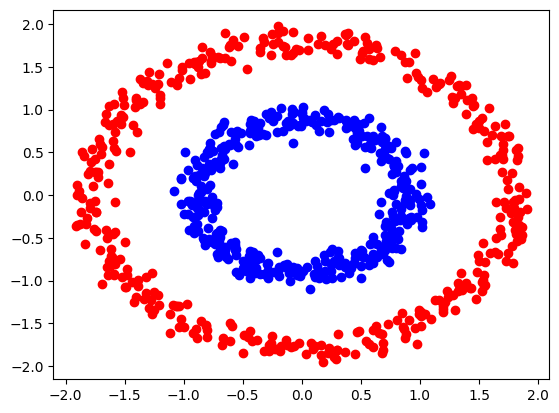

In [5]:
# plot data
plt.scatter(X_train[0,np.ravel(y_train==0)],X_train[1,np.ravel(y_train==0)],color='r')
plt.scatter(X_train[0,np.ravel(y_train==1)],X_train[1,np.ravel(y_train==1)],color='b')

# 4. Define the MLP class with forward, backward and update methods

In [6]:
class C_MultiLayerPerceptron:
    """
    A class used to represent a Multi-Layer Perceptron with 1 hidden layers

    ...

    Attributes
    ----------
    W1, b1, W2, b2:
        weights and biases to be learnt
    Z1, A1, Z2, A2:
        values of the internal neurons to be used for backpropagation
    dW1, db1, dW2, db2, dZ1, dZ2:
        partial derivatives of the loss w.r.t. parameters

    Methods
    -------
    forward_propagation

    backward_propagation

    update_parameters

    """

    W1, b1, W2, b2 = [], [], [], []
    Z1, A1, Z2, A2 = [], [], [], []
    dW1, db1, dW2, db2 = [], [], [], []
    dZ1, dA1, dZ2 = [], [], []

    def __init__(self, n_in, n_h, n_out):
        #initialise weight and biases parameters
        self.W1 = np.random.randn(n_h, n_in) * 0.01
        self.b1 = np.zeros(shape=(n_h, 1))
        self.W2 = np.random.randn(n_out, n_h) * 0.01
        self.b2 = np.zeros(shape=(n_out, 1))
        return


    def __setattr__(self, attrName, val):
        if hasattr(self, attrName):
            self.__dict__[attrName] = val
        else:
            raise Exception("self.%s note part of the fields" % attrName)



    def M_forwardPropagation(self, X):
        """Forward propagation in the MLP

        Parameters
        ----------
        X: numpy array (nbDim, nbData)
            observation data

        Return
        ------
        hat_y: numpy array (1, nbData)
            predicted value by the MLP
        """
        # --- START CODE HERE
        self.Z1 = np.dot(self.W1, X) + self.b1
        self.A1 = F_relu(self.Z1)
        self.Z2 = np.dot(self.W2, self.A1) + self.b2
        self.A2 = F_sigmoid(self.Z2)
        # --- END CODE HERE
        hat_y = self.A2

        return hat_y


    def M_backwardPropagation(self, X, y):
        """Backward propagation in the MLP

        Parameters
        ----------
        X: numpy array (nbDim, nbData)
            observation data
        y: numpy array (1, nbData)
            ground-truth class to predict

        """

        m = y.shape[1]  #batch size
        # --- START CODE HERE
        self.dZ2 = self.A2 - y
        self.dW2 = np.dot(self.dZ2, self.A1.T) / m
        self.db2 = np.sum(self.dZ2, axis=1, keepdims=True) / m
        self.dA1 = np.dot(self.W2.T, self.dZ2)
        self.dZ1 = self.dA1 * F_dRelu(self.Z1)
        self.dW1 = np.dot(self.dZ1, X.T) / m
        self.db1 = np.sum(self.dZ1, axis=1, keepdims=True) / m
        # --- END CODE HERE
        return


    def M_gradientDescent(self, alpha):
        """Update the parameters of the network using gradient descent

        Parameters
        ----------
        alpha: float scalar
            amount of update at each step of the gradient descent

        """

        # --- START CODE HERE
        self.W1 = self.W1 - alpha * self.dW1
        self.b1 = self.b1 - alpha * self.db1
        self.W2 = self.W2 - alpha * self.dW2
        self.b2 = self.b2 - alpha * self.db2
        # --- END CODE HERE

        return


# 5. Perform training using batch-gradient and epochs

In [7]:
# Instantiate the class MLP with providing
# the size of the various layers (input=4, hidden=10, outout=1)

n_hidden = 10
num_epoch = 5000


myMLP = C_MultiLayerPerceptron(n_in, n_hidden, n_out)

train_cost, train_accuracy, test_cost, test_accuracy = [], [], [], []

# Run over epochs
for i in range(0, num_epoch):

    # --- Forward
    y_predict_train = myMLP.M_forwardPropagation(X_train)

    # --- Store results on train
    train_cost.append( F_computeCost(y_predict_train, y_train) )
    train_accuracy.append( F_computeAccuracy(y_predict_train, y_train) )

    # --- Backward
    myMLP.M_backwardPropagation(X_train, y_train)

    # --- Update
    myMLP.M_gradientDescent(alpha=0.1)

    # --- Store results on test
    y_predict_test = myMLP.M_forwardPropagation(X_test)
    test_cost.append( F_computeCost(y_predict_test, y_test) )
    test_accuracy.append( F_computeAccuracy(y_predict_test, y_test) )

    if (i % 100)==0:
        print("epoch: {0:d} (cost: train {1:.2f} test {2:.2f}) (accuracy: train {3:.2f} test {4:.2f})".format(i, train_cost[-1], test_cost[-1], train_accuracy[-1], test_accuracy[-1]))

epoch: 0 (cost: train 0.69 test 0.69) (accuracy: train 0.49 test 0.46)
epoch: 100 (cost: train 0.69 test 0.69) (accuracy: train 0.51 test 0.46)
epoch: 200 (cost: train 0.69 test 0.69) (accuracy: train 0.51 test 0.46)
epoch: 300 (cost: train 0.69 test 0.69) (accuracy: train 0.51 test 0.46)
epoch: 400 (cost: train 0.68 test 0.69) (accuracy: train 0.51 test 0.46)
epoch: 500 (cost: train 0.66 test 0.68) (accuracy: train 0.57 test 0.51)
epoch: 600 (cost: train 0.62 test 0.64) (accuracy: train 0.62 test 0.56)
epoch: 700 (cost: train 0.54 test 0.56) (accuracy: train 0.93 test 0.90)
epoch: 800 (cost: train 0.43 test 0.44) (accuracy: train 1.00 test 0.98)
epoch: 900 (cost: train 0.32 test 0.34) (accuracy: train 1.00 test 0.99)
epoch: 1000 (cost: train 0.24 test 0.26) (accuracy: train 1.00 test 0.99)
epoch: 1100 (cost: train 0.18 test 0.20) (accuracy: train 1.00 test 1.00)
epoch: 1200 (cost: train 0.14 test 0.15) (accuracy: train 1.00 test 1.00)
epoch: 1300 (cost: train 0.11 test 0.12) (accuracy

## Display train/test loss and accuracy

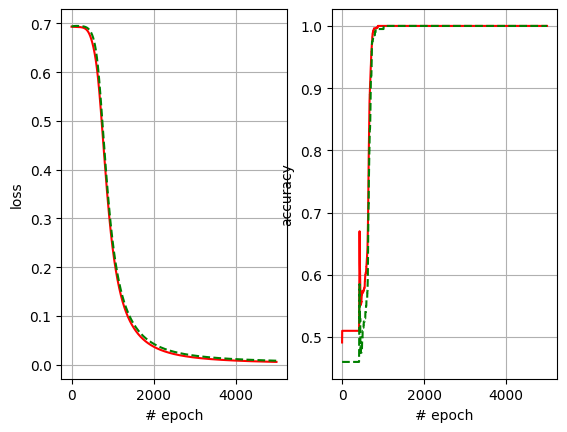

In [8]:
plt.subplot(1,2,1)
plt.plot(train_cost, 'r')
plt.plot(test_cost, 'g--')
plt.xlabel('# epoch')
plt.ylabel('loss')
plt.grid(True)
plt.subplot(1,2,2)
plt.plot(train_accuracy, 'r')
plt.plot(test_accuracy, 'g--')
plt.xlabel('# epoch')
plt.ylabel('accuracy')
plt.grid(True)

In [9]:
train_accuracy

[0.49125,
 0.51,
 0.51,
 0.51,
 0.51,
 0.51,
 0.51,
 0.51,
 0.51,
 0.51,
 0.51,
 0.51,
 0.51,
 0.51,
 0.51,
 0.51,
 0.51,
 0.51,
 0.51,
 0.51,
 0.51,
 0.51,
 0.51,
 0.51,
 0.51,
 0.51,
 0.51,
 0.51,
 0.51,
 0.51,
 0.51,
 0.51,
 0.51,
 0.51,
 0.51,
 0.51,
 0.51,
 0.51,
 0.51,
 0.51,
 0.51,
 0.51,
 0.51,
 0.51,
 0.51,
 0.51,
 0.51,
 0.51,
 0.51,
 0.51,
 0.51,
 0.51,
 0.51,
 0.51,
 0.51,
 0.51,
 0.51,
 0.51,
 0.51,
 0.51,
 0.51,
 0.51,
 0.51,
 0.51,
 0.51,
 0.51,
 0.51,
 0.51,
 0.51,
 0.51,
 0.51,
 0.51,
 0.51,
 0.51,
 0.51,
 0.51,
 0.51,
 0.51,
 0.51,
 0.51,
 0.51,
 0.51,
 0.51,
 0.51,
 0.51,
 0.51,
 0.51,
 0.51,
 0.51,
 0.51,
 0.51,
 0.51,
 0.51,
 0.51,
 0.51,
 0.51,
 0.51,
 0.51,
 0.51,
 0.51,
 0.51,
 0.51,
 0.51,
 0.51,
 0.51,
 0.51,
 0.51,
 0.51,
 0.51,
 0.51,
 0.51,
 0.51,
 0.51,
 0.51,
 0.51,
 0.51,
 0.51,
 0.51,
 0.51,
 0.51,
 0.51,
 0.51,
 0.51,
 0.51,
 0.51,
 0.51,
 0.51,
 0.51,
 0.51,
 0.51,
 0.51,
 0.51,
 0.51,
 0.51,
 0.51,
 0.51,
 0.51,
 0.51,
 0.51,
 0.51,
 0.51,
 0.51,
 0.

In [10]:
test_accuracy

[0.46,
 0.46,
 0.46,
 0.46,
 0.46,
 0.46,
 0.46,
 0.46,
 0.46,
 0.46,
 0.46,
 0.46,
 0.46,
 0.46,
 0.46,
 0.46,
 0.46,
 0.46,
 0.46,
 0.46,
 0.46,
 0.46,
 0.46,
 0.46,
 0.46,
 0.46,
 0.46,
 0.46,
 0.46,
 0.46,
 0.46,
 0.46,
 0.46,
 0.46,
 0.46,
 0.46,
 0.46,
 0.46,
 0.46,
 0.46,
 0.46,
 0.46,
 0.46,
 0.46,
 0.46,
 0.46,
 0.46,
 0.46,
 0.46,
 0.46,
 0.46,
 0.46,
 0.46,
 0.46,
 0.46,
 0.46,
 0.46,
 0.46,
 0.46,
 0.46,
 0.46,
 0.46,
 0.46,
 0.46,
 0.46,
 0.46,
 0.46,
 0.46,
 0.46,
 0.46,
 0.46,
 0.46,
 0.46,
 0.46,
 0.46,
 0.46,
 0.46,
 0.46,
 0.46,
 0.46,
 0.46,
 0.46,
 0.46,
 0.46,
 0.46,
 0.46,
 0.46,
 0.46,
 0.46,
 0.46,
 0.46,
 0.46,
 0.46,
 0.46,
 0.46,
 0.46,
 0.46,
 0.46,
 0.46,
 0.46,
 0.46,
 0.46,
 0.46,
 0.46,
 0.46,
 0.46,
 0.46,
 0.46,
 0.46,
 0.46,
 0.46,
 0.46,
 0.46,
 0.46,
 0.46,
 0.46,
 0.46,
 0.46,
 0.46,
 0.46,
 0.46,
 0.46,
 0.46,
 0.46,
 0.46,
 0.46,
 0.46,
 0.46,
 0.46,
 0.46,
 0.46,
 0.46,
 0.46,
 0.46,
 0.46,
 0.46,
 0.46,
 0.46,
 0.46,
 0.46,
 0.46,
 0.46,
 0.46,

Tensorflow playground
You can check out the tensorflow Playground here to test out an MLP graphically :

https://playground.tensorflow.org/